In [29]:
import pytesseract
import nltk
from PIL import Image
from nltk import sent_tokenize
import re
import cv2
pytesseract.pytesseract.tesseract_cmd = "C:\\Program Files\\Tesseract-OCR\\tesseract"
img = cv2.imread("news.jpg")
text = pytesseract.image_to_string(img)
with open("text.txt","w") as f:
    f.write(text)
with open('text.txt',mode="r") as f:
    s=f.readlines()
txt=''
for i in range(len(s)):
    s[i]=re.sub("\\n",' ',s[i])
    s[i]=s[i].lower()
    txt+=s[i]
print(txt)
mysentences=sent_tokenize(txt)
nw=txt.split()
print()
print("num words",len(nw))

sc tells govt. to review orders — curbing basic rights in j&k  it asks for publication of all orders on restrictions and review of net sugpension  ~ krishnadas rajagopal new delhi     ’the supreme court on fri- |  _ day ordered the government : to review “forthwith” any ex- isting orders that restrict basic rights and free move- } ment in jammu and kashmir. the court upheld the free- doms of free speech, expres- sion and trade or business on the internet as funda- ; mental rights to be constitu- : tionally protected. * it, however, refused to ex- _ press any views on whether ‘ the very access to internet is a fundamental right or not. + thetop court directed the ‘government to review orders suspending internet services in the erstwhile state in- 5 atl: any order suspend- hing. internet found to violate     life offline: students waiting to use the internet at the _ divisional commissioner's office in srinagar recently. =afp  the law should be revoked at  once, it ordered. it further in

In [30]:
img=cv2.resize(img,(740,720))
cv2.imshow('myimg',img)
cv2.waitKey(0)

-1

In [31]:
import nltk

In [32]:
import re
import string
import numpy as np
import matplotlib.pyplot as plt
from nltk import pos_tag
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus.reader.wordnet import NOUN, VERB, ADJ, ADV
from nltk.corpus import brown, stopwords
from nltk.cluster.util import cosine_distance
from operator import itemgetter

In [33]:
sentences = brown.sents('ca01')
# sentences="Machine learning is an application of artificial intelligence (AI)that provides systems the ability to automatically learn and improve from experience without being explicitly programmed. Machine learning focuses on the development of computer programs that can access data and use it learn for themselves.The process of learning begins with observations or data, such as examples, direct experience, or instruction, in order to look for patterns in data and make better decisions in the future based on the examples that we provide. The primary aim is to allow the computers learn automatically without human intervention or assistance and adjust actions accordingly."

In [34]:
sentences

[['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', "Atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.'], ['The', 'jury', 'further', 'said', 'in', 'term-end', 'presentments', 'that', 'the', 'City', 'Executive', 'Committee', ',', 'which', 'had', 'over-all', 'charge', 'of', 'the', 'election', ',', '``', 'deserves', 'the', 'praise', 'and', 'thanks', 'of', 'the', 'City', 'of', 'Atlanta', "''", 'for', 'the', 'manner', 'in', 'which', 'the', 'election', 'was', 'conducted', '.'], ...]

In [35]:
len(sentences)

98

In [36]:
[' '.join(sent) for sent in sentences]

["The Fulton County Grand Jury said Friday an investigation of Atlanta's recent primary election produced `` no evidence '' that any irregularities took place .",
 "The jury further said in term-end presentments that the City Executive Committee , which had over-all charge of the election , `` deserves the praise and thanks of the City of Atlanta '' for the manner in which the election was conducted .",
 "The September-October term jury had been charged by Fulton Superior Court Judge Durwood Pye to investigate reports of possible `` irregularities '' in the hard-fought primary which was won by Mayor-nominate Ivan Allen Jr. .",
 "`` Only a relative handful of such reports was received '' , the jury said , `` considering the widespread interest in the election , the number of voters and the size of this city '' .",
 "The jury said it did find that many of Georgia's registration and election laws `` are outmoded or inadequate and often ambiguous '' .",
 "It recommended that Fulton legisla

In [37]:
class TextCleaner():
    
    def __init__(self):
        self.stop_words = set(stopwords.words("english"))
        self.punctuations = set(string.punctuation)
        self.pos_tags = {
                NOUN: ['NN', 'NNS', 'NNP', 'NNPS', 'PRP', 'PRP$', 'WP', 'WP$'],
                VERB: ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ'],
                ADJ: ['JJ', 'JJR', 'JJS'],
                ADV: ['RB', 'RBR', 'RBS', 'WRB']
        }


    def _remove_stop_words(self, words):
        return [w for w in words if w not in self.stop_words]
     
    
    def _remove_regex(self):
        self.input_sent = " ".join([w.lower() for w in self.input_sent])
        self.input_sent = re.sub(r"i'm", "i am", self.input_sent)
        self.input_sent = re.sub(r"he's", "he is", self.input_sent)
        self.input_sent = re.sub(r"she's", "she is", self.input_sent)
        self.input_sent = re.sub(r"that's", "that is", self.input_sent)
        self.input_sent = re.sub(r"what's", "what is", self.input_sent)
        self.input_sent = re.sub(r"where's", "where is", self.input_sent)
        self.input_sent = re.sub(r"\'ll", " will", self.input_sent)
        self.input_sent = re.sub(r"\'ve", " have", self.input_sent)
        self.input_sent = re.sub(r"\'re", " are", self.input_sent)
        self.input_sent = re.sub(r"\'d", " would", self.input_sent)
        self.input_sent = re.sub(r"won't", "will not", self.input_sent)
        self.input_sent = re.sub(r"can't", "cannot", self.input_sent)
        self.input_sent = re.sub(r"don't", "do not", self.input_sent)
        patterns = re.finditer("#[\w]*", self.input_sent)
        for pattern in patterns:
            self.input_sent = re.sub(pattern.group().strip(), "", self.input_sent)
        self.input_sent = "".join(ch for ch in self.input_sent if ch not in self.punctuations)
    
    
    def _tokenize(self):
        return word_tokenize(self.input_sent)
    
    
    def _process_content_for_pos(self, words):
        tagged_words = pos_tag(words)
        pos_words = []
        for word in tagged_words:
            flag = False
            for key, value in self.pos_tags.items():
                if word[1] in value:
                    pos_words.append((word[0], key))
                    flag = True
                    break
            if not flag:
                pos_words.append((word[0], NOUN))
        return pos_words
       
                 
    def _remove_noise(self):
        self._remove_regex()
        words = self._tokenize()
        noise_free_words = self._remove_stop_words(words)
        return noise_free_words
    
    
    def _normalize_text(self, words):
        lem = WordNetLemmatizer()
        pos_words = self._process_content_for_pos(words)
        normalized_words = [lem.lemmatize(w, pos=p) for w, p in pos_words]
        return normalized_words
    
    
    def clean_up(self, input_sent):
        self.input_sent = input_sent
        cleaned_words = self._remove_noise()
        cleaned_words = self._normalize_text(cleaned_words)
        return cleaned_words

<h1>PageRank Algorithm</h1>

In [38]:
def pagerank(M, eps=1.0e-8, d=0.85):
    N = M.shape[1]
    v = np.random.rand(N, 1)
    v = v / np.linalg.norm(v, 1)
    last_v = np.ones((N, 1), dtype=np.float32) * np.inf
    M_hat = (d * M) + (((1 - d) / N) * np.ones((N, N), dtype=np.float32))
    
    while np.linalg.norm(v - last_v, 2) > eps:
        last_v = v
        v = np.matmul(M_hat, v)
    return v

<h1>Function to calculate cosine similarity among sentences</h1>

In [39]:
def sentence_similarity(sent1, sent2):
    text_cleaner = TextCleaner()
    
    sent1 = text_cleaner.clean_up(sent1)
    sent2 = text_cleaner.clean_up(sent2)
    
    all_words = list(set(sent1 + sent2))
    
    vector1 = [0] * len(all_words)
    vector2 = [0] * len(all_words)
    
    for w in sent1:
        vector1[all_words.index(w)] += 1
    
    for w in sent2:
        vector2[all_words.index(w)] += 1
    
    return 1 - cosine_distance(vector1, vector2)

<h1>Similarity Adjacency Matrix for PageRank</h1>

In [40]:
def build_similarity_matrix(sentences):
    S = np.zeros((len(sentences), len(sentences)))
    for i in range(len(sentences)):
        for j in range(len(sentences)):
            if i == j:
                continue
            else:
                S[i][j] = sentence_similarity(sentences[i], sentences[j])
    
    for i in range(len(S)):
        S[i] /= S[i].sum()
    return S

In [41]:
sentences = mysentences
sentences

['sc tells govt.',
 'to review orders — curbing basic rights in j&k  it asks for publication of all orders on restrictions and review of net sugpension  ~ krishnadas rajagopal new delhi     ’the supreme court on fri- |  _ day ordered the government : to review “forthwith” any ex- isting orders that restrict basic rights and free move- } ment in jammu and kashmir.',
 'the court upheld the free- doms of free speech, expres- sion and trade or business on the internet as funda- ; mental rights to be constitu- : tionally protected.',
 '* it, however, refused to ex- _ press any views on whether ‘ the very access to internet is a fundamental right or not.',
 '+ thetop court directed the ‘government to review orders suspending internet services in the erstwhile state in- 5 atl: any order suspend- hing.',
 "internet found to violate     life offline: students waiting to use the internet at the _ divisional commissioner's office in srinagar recently.",
 '=afp  the law should be revoked at  once,

In [15]:
S = build_similarity_matrix(sentences)
S

array([[0.        , 0.06038976, 0.06385489, 0.05952598, 0.06341114,
        0.07231609, 0.07750558, 0.05199449, 0.1039077 , 0.05133225,
        0.01951512, 0.0923624 , 0.07838156, 0.01632752, 0.08554304,
        0.02851875, 0.07511373],
       [0.03128756, 0.        , 0.07016961, 0.07151806, 0.07193538,
        0.06774881, 0.06650971, 0.07348128, 0.06283554, 0.07071245,
        0.03579502, 0.04235324, 0.07093415, 0.06382416, 0.06971804,
        0.06488684, 0.06629015],
       [0.03275579, 0.06947596, 0.        , 0.07148933, 0.07198959,
        0.06991914, 0.07002324, 0.06808834, 0.06696268, 0.06977971,
        0.02865061, 0.05524421, 0.0706666 , 0.0550441 , 0.07304718,
        0.05763455, 0.06922897],
       [0.03083944, 0.07151667, 0.07220168, 0.        , 0.07424047,
        0.06872088, 0.07050483, 0.07033503, 0.06529792, 0.07423082,
        0.02866847, 0.05257754, 0.06927306, 0.05636655, 0.07113792,
        0.05760584, 0.06648287],
       [0.03242052, 0.07098859, 0.07175137, 0.073264

In [16]:
sentence_ranks = pagerank(S)
sentence_ranks

array([[0.08545412],
       [0.0996755 ],
       [0.01184276],
       [0.00762235],
       [0.06512511],
       [0.02479644],
       [0.0880892 ],
       [0.02358452],
       [0.08537407],
       [0.10950929],
       [0.06594962],
       [0.10300778],
       [0.06076176],
       [0.06250809],
       [0.01301882],
       [0.01601348],
       [0.07766709]])

<h1>Sentence Ranked according to their importance</h1>

In [17]:
ranked_sentence_indexes = [item[0] for item in sorted(enumerate(sentence_ranks), key=lambda item: -item[1])]
ranked_sentence_indexes

[9, 11, 1, 6, 0, 8, 16, 10, 4, 13, 12, 5, 7, 15, 14, 2, 3]

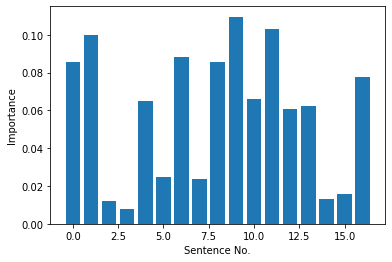

In [18]:
plt.bar([item[0] for item in sorted(enumerate(sentence_ranks))], sentence_ranks.T[0])
plt.xlabel("Sentence No.")
plt.ylabel("Importance")
plt.show()

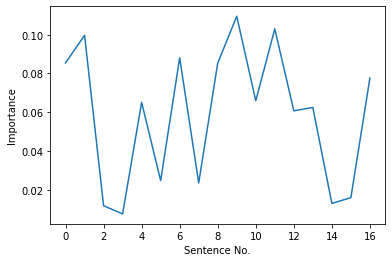

In [19]:
plt.plot([item[0] for item in sorted(enumerate(sentence_ranks))], sentence_ranks)
plt.xlabel("Sentence No.")
plt.ylabel("Importance")
plt.show()

In [20]:
SUMMARY_SIZE = 5

In [21]:
selected_sentences = sorted(ranked_sentence_indexes[:SUMMARY_SIZE])

In [22]:
selected_sentences

[0, 1, 6, 9, 11]

In [23]:
summary = itemgetter(*selected_sentences)(sentences)

<h1>Generated Summary</h1>

In [24]:
string=""
for sent in summary:
    string+=sent
nw=string.split()
print("Num words ",len(nw))

Num words  88


In [25]:
print(string)

sc tells govt.to review orders — curbing basic rights in j&k  it asks for publication of all orders on restrictions and review of net sugpension  ~ krishnadas rajagopal new delhi     ’the supreme court on fri- |  _ day ordered the government : to review “forthwith” any ex- isting orders that restrict basic rights and free move- } ment in jammu and kashmir.=afp  the law should be revoked at  once, it ordered.other essential services | : jn areas in the union territo-  ty, where it was otherwise not.so immediately.
